<a href="https://colab.research.google.com/github/Kiwihead15/FCC-Works/blob/main/Book_recommendation_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you will create a book recommendation algorithm using **K-Nearest Neighbors**.

You will use the [Book-Crossings dataset](http://www2.informatik.uni-freiburg.de/~cziegler/BX/). This dataset contains 1.1 million ratings (scale of 1-10) of 270,000 books by 90,000 users. 

After importing and cleaning the data, use `NearestNeighbors` from `sklearn.neighbors` to develop a model that shows books that are similar to a given book. The Nearest Neighbors algorithm measures distance to determine the “closeness” of instances.

Create a function named `get_recommends` that takes a book title (from the dataset) as an argument and returns a list of 5 similar books with their distances from the book argument.

This code:

`get_recommends("The Queen of the Damned (Vampire Chronicles (Paperback))")`

should return:

```
[
  'The Queen of the Damned (Vampire Chronicles (Paperback))',
  [
    ['Catch 22', 0.793983519077301], 
    ['The Witching Hour (Lives of the Mayfair Witches)', 0.7448656558990479], 
    ['Interview with the Vampire', 0.7345068454742432],
    ['The Tale of the Body Thief (Vampire Chronicles (Paperback))', 0.5376338362693787],
    ['The Vampire Lestat (Vampire Chronicles, Book II)', 0.5178412199020386]
  ]
]
```

Notice that the data returned from `get_recommends()` is a list. The first element in the list is the book title passed in to the function. The second element in the list is a list of five more lists. Each of the five lists contains a recommended book and the distance from the recommended book to the book passed in to the function.

If you graph the dataset (optional), you will notice that most books are not rated frequently. To ensure statistical significance, remove from the dataset users with less than 200 ratings and books with less than 100 ratings.

The first three cells import libraries you may need and the data to use. The final cell is for testing. Write all your code in between those cells.

In [ ]:
# import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [ ]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

--2022-07-18 06:49:56--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip’

book-crossings.zip  100%[===================>]  24.88M  7.56MB/s    in 3.3s    

2022-07-18 06:50:00 (7.56 MB/s) - ‘book-crossings.zip’ saved [26085508/26085508]

Archive:  book-crossings.zip
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [ ]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

In [ ]:
# add your code here - consider creating a new cell for each section of code


###DataFrame of books info and look

In [ ]:
df_books.info()
df_books


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   isbn    271379 non-null  object
 1   title   271379 non-null  object
 2   author  271378 non-null  object
dtypes: object(3)
memory usage: 6.2+ MB


,isbn,title,author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber
...,...,...,...
271374,0440400988,There's a Bat in Bunk Five,Paula Danziger
271375,0525447644,From One to One Hundred,Teri Sloat
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker
271377,0192126040,Republic (World's Classics),Plato


###DataFrame of users info and look

In [ ]:
df_ratings.info()
df_ratings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   user    1149780 non-null  int32  
 1   isbn    1149780 non-null  object 
 2   rating  1149780 non-null  float32
dtypes: float32(1), int32(1), object(1)
memory usage: 17.5+ MB


,user,isbn,rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0
...,...,...,...
1149775,276704,1563526298,9.0
1149776,276706,0679447156,0.0
1149777,276709,0515107662,10.0
1149778,276721,0590442449,10.0


###Plotting rows per user, and rows per isbn. It seems that most of users don´t rating the books, also most books have very few ratings.

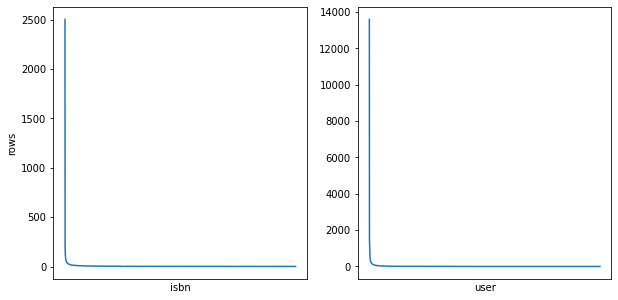

In [ ]:
fig,axs = plt.subplots(1,2,figsize = (10,5))
axs[0].set(xlabel = 'isbn')
df_ratings.isbn.value_counts().plot(use_index = False, xticks = [], ylabel = 'rows', ax = axs[0])
axs[1].set(xlabel = 'user')
df_ratings.user.value_counts().plot(use_index = False, xticks = [], ax = axs[1])

##Let´s remove users with less than 200 ratings and books with less than a 100 ratings

###Users with more than 200 ratings

In [ ]:
List_Criteria_A = df_ratings.user.value_counts().loc[lambda x: x>=200]
List_Criteria_A

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
83671       200
252827      200
99955       200
36554       200
26883       200
Name: user, Length: 905, dtype: int64

###Books with more than 100 ratings

In [ ]:
List_Criteria_B = df_ratings.isbn.value_counts().loc[lambda x: x>=100]
List_Criteria_B

0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
              ... 
0786866586     100
0449203794     100
0425151867     100
0312966806     100
0425136981     100
Name: isbn, Length: 731, dtype: int64

## Ratings > 0

In [ ]:
List_Criteria_C = df_ratings.rating.loc[lambda x: x>0].index
List_Criteria_C

Int64Index([      1,       3,       4,       6,       7,       8,       9,
                 16,      19,      20,
            ...
            1149746, 1149747, 1149761, 1149762, 1149771, 1149773, 1149775,
            1149777, 1149778, 1149779],
           dtype='int64', length=433671)

### DataFrame of books with more than 100 ratings > 0 from users with more than 200 ratings > 0 

In [ ]:
df_worthy_ratings = df_ratings.loc[((df_ratings.user.isin(List_Criteria_A.index))
                                    &(df_ratings.isbn.isin(List_Criteria_B.index))) 
                                    ].reset_index(drop = True)


df_worthy_ratings

,user,isbn,rating
0,277427,002542730X,10.0
1,277427,0060930535,0.0
2,277427,0060934417,0.0
3,277427,0061009059,9.0
4,277427,0140067477,0.0
...,...,...,...
49776,275970,0804111359,0.0
49777,275970,140003065X,0.0
49778,275970,1400031346,0.0
49779,275970,1400031354,0.0


Plotting rows per user and rows per isbn after cleaning

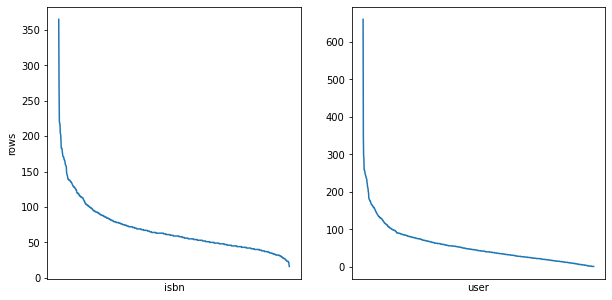

In [ ]:
fig,axs = plt.subplots(1,2,figsize = (10,5))
axs[0].set(xlabel = 'isbn')
df_worthy_ratings.isbn.value_counts().plot(use_index = False, xticks = [], ylabel = 'rows', ax = axs[0])
axs[1].set(xlabel = 'user')
df_worthy_ratings.user.value_counts().plot(use_index = False, xticks = [], ax = axs[1])

Join Both DataFrames in order to get the book´s titles for each rating

In [ ]:
#df_worthy_ratings_with_titles = pd.merge(df_worthy_ratings, df_books, on = 'isbn', how="inner",indicator=True)
df_worthy_ratings_with_titles = pd.merge(df_worthy_ratings, df_books, on = 'isbn', how="inner")
df_worthy_ratings_with_titles


,user,isbn,rating,title,author
0,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
1,3363,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
2,11676,002542730X,6.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
3,12538,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
4,13552,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
...,...,...,...,...,...
49512,238864,0399149325,0.0,Portrait of a Killer: Jack the Ripper -- Case ...,Patricia Cornwell
49513,251843,0399149325,1.0,Portrait of a Killer: Jack the Ripper -- Case ...,Patricia Cornwell
49514,253821,0399149325,0.0,Portrait of a Killer: Jack the Ripper -- Case ...,Patricia Cornwell
49515,265115,0399149325,0.0,Portrait of a Killer: Jack the Ripper -- Case ...,Patricia Cornwell


###Removing duplicating ratings from the same user for the same book, keeping just the first. 

In [ ]:
df_books_ratings = df_worthy_ratings_with_titles.drop_duplicates(['title','user'], keep="first")
df_books_ratings

,user,isbn,rating,title,author
0,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
1,3363,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
2,11676,002542730X,6.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
3,12538,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
4,13552,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
...,...,...,...,...,...
49512,238864,0399149325,0.0,Portrait of a Killer: Jack the Ripper -- Case ...,Patricia Cornwell
49513,251843,0399149325,1.0,Portrait of a Killer: Jack the Ripper -- Case ...,Patricia Cornwell
49514,253821,0399149325,0.0,Portrait of a Killer: Jack the Ripper -- Case ...,Patricia Cornwell
49515,265115,0399149325,0.0,Portrait of a Killer: Jack the Ripper -- Case ...,Patricia Cornwell


In [ ]:
# Convert to 2D matrıx
books_with_ratings_pivot = df_books_ratings.pivot(index = 'title', columns = 'user', values = 'rating').fillna(0)
books_with_ratings_pivot.head()

user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
books_with_ratings_matrix = csr_matrix(books_with_ratings_pivot.values)

In [ ]:
# Train Model
#[‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]
model_knn = NearestNeighbors(algorithm='brute', metric='cosine')
model_knn.fit(books_with_ratings_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
# function to return recommended books - this will be tested
def get_recommends(book = ""):
  X = books_with_ratings_pivot[books_with_ratings_pivot.index == book]
  X = X.to_numpy().reshape(1,-1)
  distances, indices = model_knn.kneighbors(X,n_neighbors=5)
  recommended_books = []
  for i in range(0,len(distances.flatten())):
    if i == 0:
      recommended_books.append(books_with_ratings_pivot.index[indices.flatten()[0]])
      recommended_books.append([])
    else:
      recommended_books[1].append([books_with_ratings_pivot.index[indices.flatten()[-i]], distances.flatten()[-i]])

  return recommended_books

Use the cell below to test your function. The `test_book_recommendation()` function will inform you if you passed the challenge or need to keep trying.

In [ ]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2): 
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You haven't passed yet. Keep trying!")

test_book_recommendation()

["Where the Heart Is (Oprah's Book Club (Paperback))", [['The Weight of Water', 0.77085835], ['The Surgeon', 0.7699411], ['I Know This Much Is True', 0.7677075], ['The Lovely Bones: A Novel', 0.7234864]]]
You passed the challenge! 🎉🎉🎉🎉🎉
